# Data Project - Stock Market Analysis

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    (.1.) What was the change in price of the stock over time?
    (.2.) What was the daily return of the stock on average?
    (.3.) What was the moving average of the various stocks?
    (.4.) What was the correlation between different stocks' closing prices?
    (.5.) What was the correlation between different stocks' daily returns?
    (.6.) How much value do we put at risk by investing in a particular stock?
    (.7.) How can we attempt to predict future stock behavior?

In [1]:
# Usual imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy.stats as stats
%matplotlib inline

In [3]:
# import for reading stock info from internet using pandas
from pandas_datareader.data import DataReader

In [4]:
# For time stamps
from datetime import datetime

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-21,69.312500,66.357498,69.070000,67.092499,180991600.0,66.576424
2020-04-22,69.474998,68.050003,68.402496,69.025002,117057200.0,68.494064
2020-04-23,70.437500,68.717499,68.967499,68.757500,124814400.0,68.228622
2020-04-24,70.752502,69.250000,69.300003,70.742500,126508800.0,70.198349
2020-04-27,71.135002,69.987503,70.449997,70.792503,117087600.0,70.247971
...,...,...,...,...,...,...
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.839996


In [9]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,113.539220,110.537539,112.119289,112.089733,1.320552e+08,111.809745
std,19.465684,18.891604,19.346464,19.172259,5.218013e+07,19.300060
min,69.312500,66.357498,68.402496,67.092499,4.669130e+07,66.576424
25%,97.147499,94.705002,96.417503,96.190002,9.426420e+07,95.708496
50%,119.059998,115.830002,117.589996,116.970001,1.170876e+08,116.594315
75%,127.900002,124.129997,126.012497,125.900002,1.555524e+08,125.900002
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [10]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-21 to 2021-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


### Basic Analysis

<AxesSubplot:xlabel='Date'>

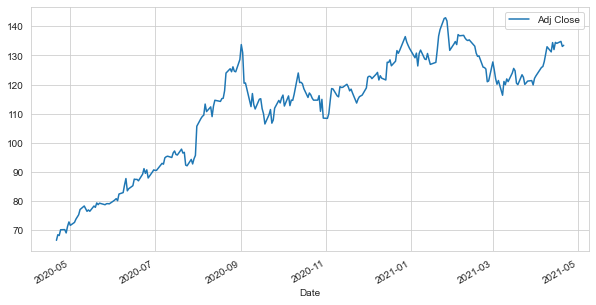

In [11]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend = True, figsize = (10, 5))

<AxesSubplot:xlabel='Date'>

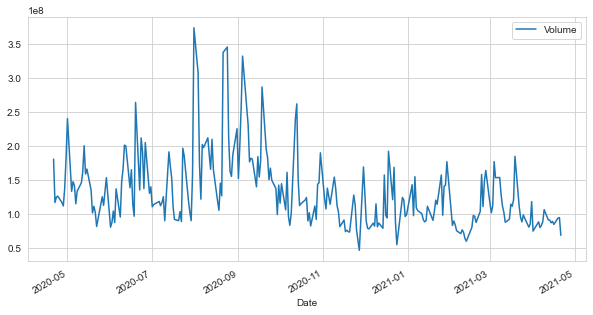

In [12]:
# Now let's plot the total volume of stock being traded
AAPL['Volume'].plot(legend = True, figsize = (10, 5))

In [13]:
# Let's go ahead and plot out several moving averages

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s Days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean() 

<AxesSubplot:xlabel='Date'>

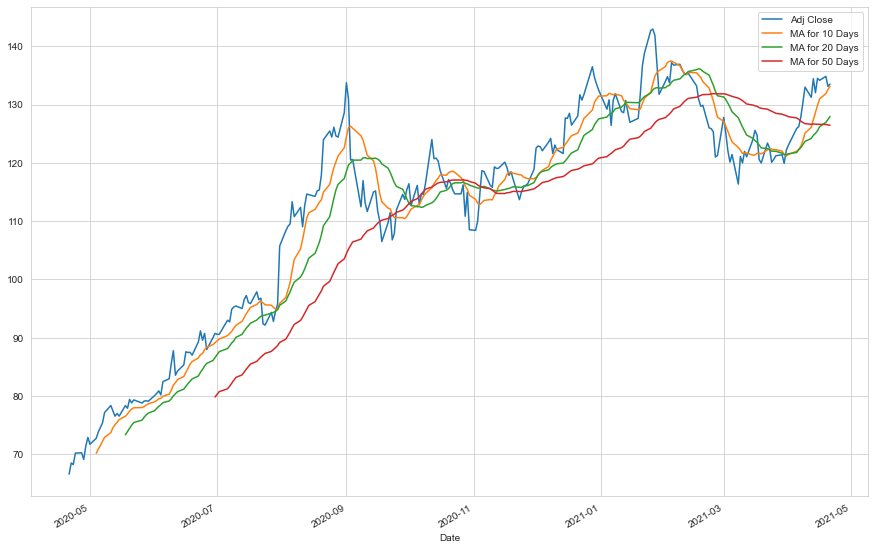

In [14]:
# Let's plot all the additional Moving Averages

AAPL[['Adj Close', 'MA for 10 Days', 'MA for 20 Days', 'MA for 50 Days']].plot(subplots = False, figsize = (15, 10))



### Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

<AxesSubplot:xlabel='Date'>

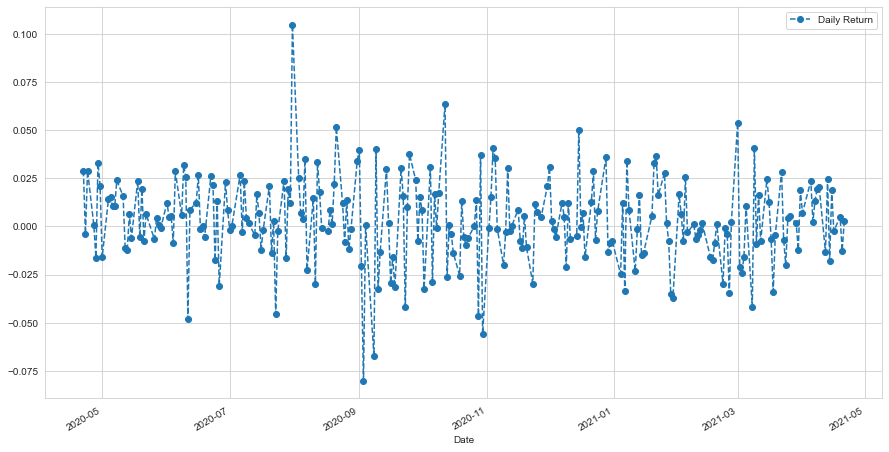

In [15]:
# We'll use pct_change to find the percent change for each day

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (15, 8), legend = True, linestyle = '--', marker = 'o')


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

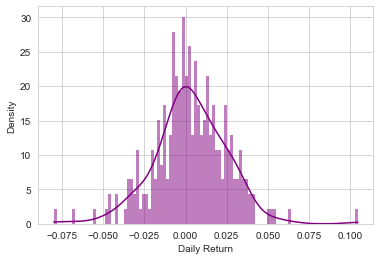

In [16]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple', kde=True, stat="density", linewidth=0)

<AxesSubplot:>

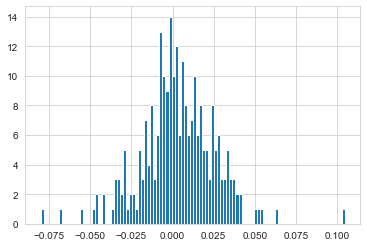

In [17]:
# Could have also done:
AAPL['Daily Return'].dropna().hist(bins = 100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-21,66.576424,1216.339966,166.131760,2328.120117
2020-04-22,68.494064,1263.209961,171.774429,2363.489990
2020-04-23,68.228622,1276.310059,169.695557,2399.449951
2020-04-24,70.198349,1279.310059,172.794067,2410.219971
2020-04-27,70.247971,1275.880005,172.299103,2376.000000


In [19]:
# Make a new tech returns DataFrame

tech_returns = closing_df.pct_change()

tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-21,NaN,NaN,NaN,NaN
2020-04-22,0.028804,0.038534,0.033965,0.015192
2020-04-23,-0.003875,0.010370,-0.012102,0.015215
2020-04-24,0.028870,0.002351,0.018259,0.004489
2020-04-27,0.000707,-0.002681,-0.002864,-0.014198


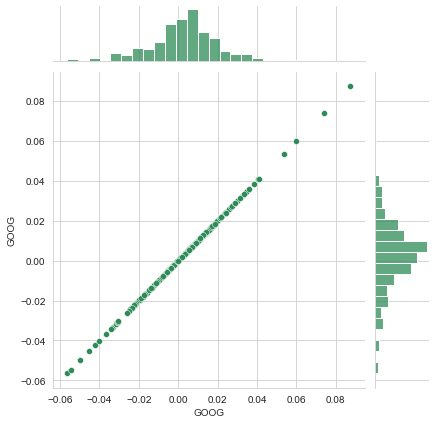

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_returns, kind = 'scatter', color = 'seagreen')

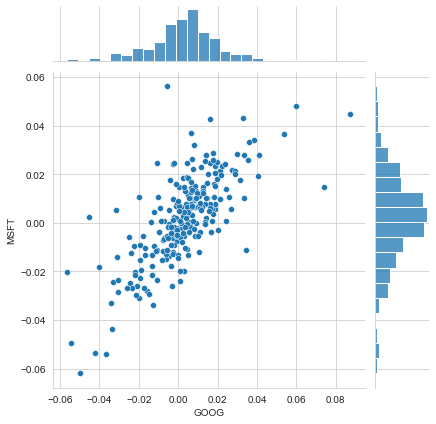

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

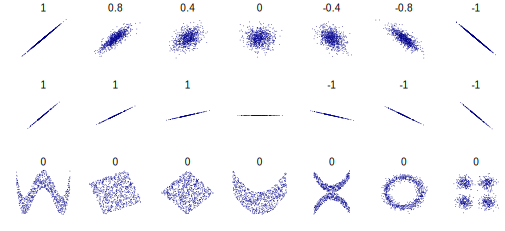

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

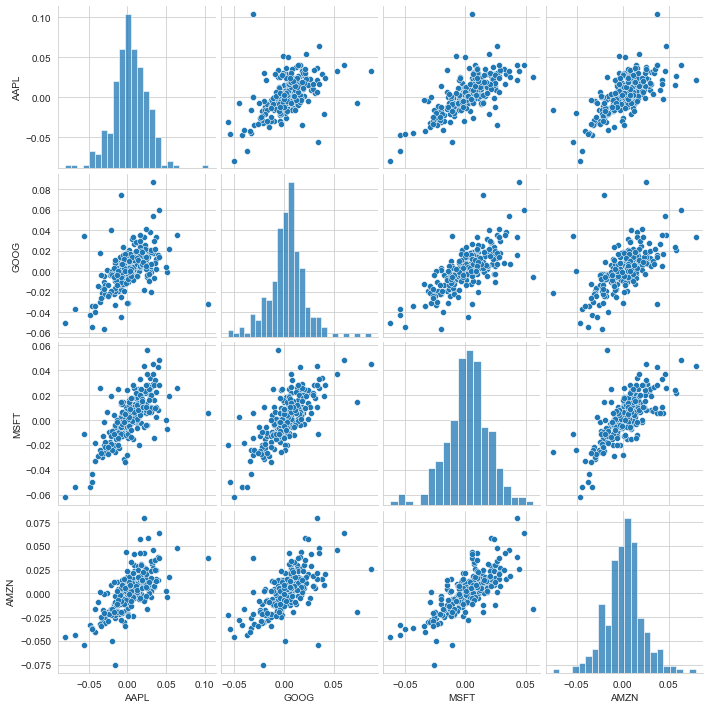

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())

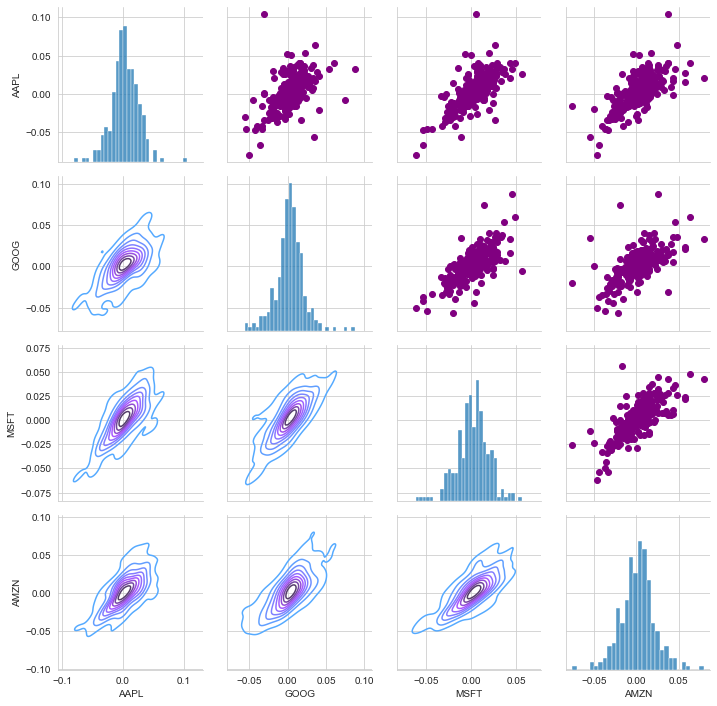

In [24]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot, bins = 30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

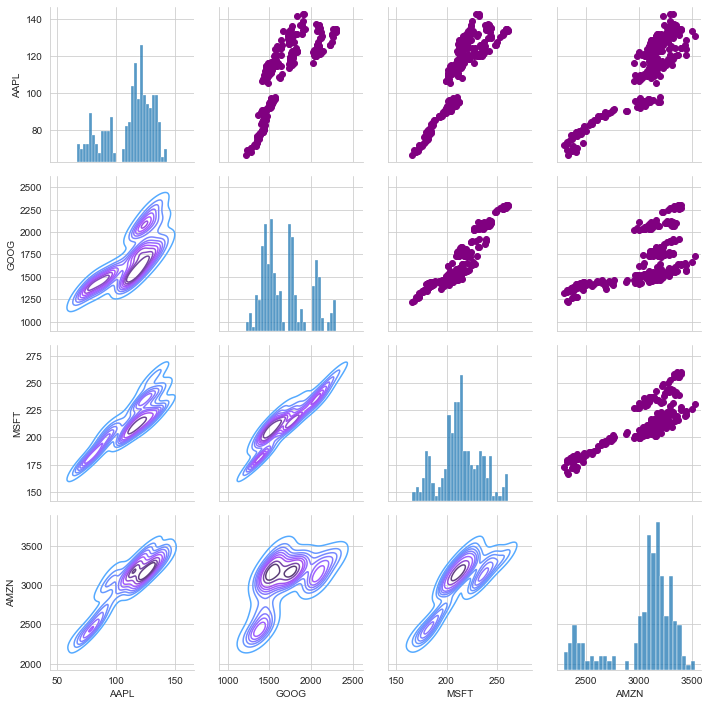

In [25]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(sns.histplot,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

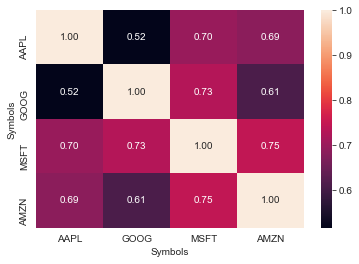

In [26]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
tech_rets_corr= tech_returns.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

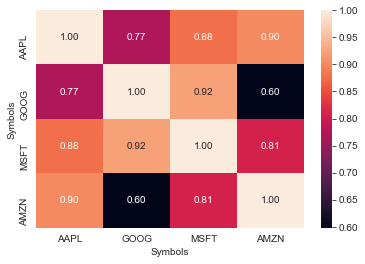

In [27]:
# Let's go ahead and use sebron for a quick correlation plot for the closing
closing_corr= closing_df.dropna().corr()
sns.heatmap(closing_corr, annot=True, fmt='.2f')
plt.show()

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

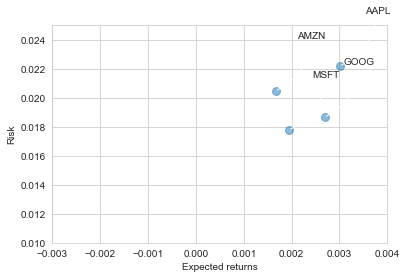

In [28]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

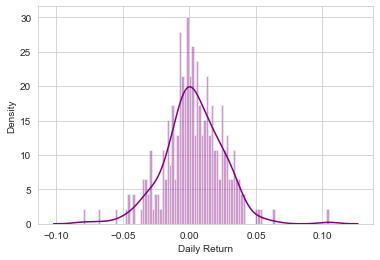

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [30]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.0331028222723771

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [31]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns.

In [47]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Grate now let's put our function to work!

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

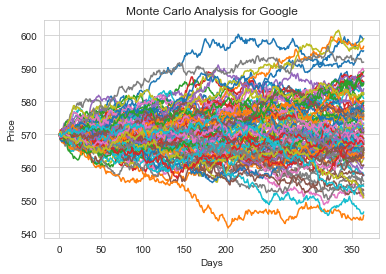

In [48]:
# Get start price from GOOG.head()
start_price = 569.85

for x in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [50]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

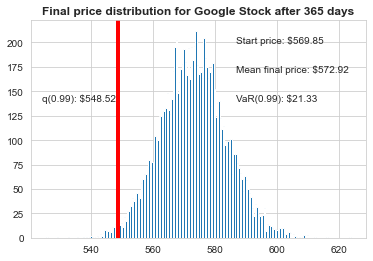

In [51]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.